In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from datetime import datetime

In [2]:
# https://fred.stlouisfed.org/series/CUSR0000SETA02
used_cars=pd.read_csv("Data_files/used_cars_trucks.csv", index_col=0, parse_dates=True)
used_cars

,Value
Date,
2015-01-01,144.875
2015-02-01,147.264
2015-03-01,147.694
2015-04-01,148.404
2015-05-01,149.290
...,...
2022-07-01,209.998
2022-08-01,209.782
2022-09-01,207.532


In [3]:
value_used_cars = used_cars['Value']
value_used_cars

Date
2015-01-01    144.875
2015-02-01    147.264
2015-03-01    147.694
2015-04-01    148.404
2015-05-01    149.290
               ...   
2022-07-01    209.998
2022-08-01    209.782
2022-09-01    207.532
2022-10-01    202.510
2022-11-01    196.539
Name: Value, Length: 95, dtype: float64

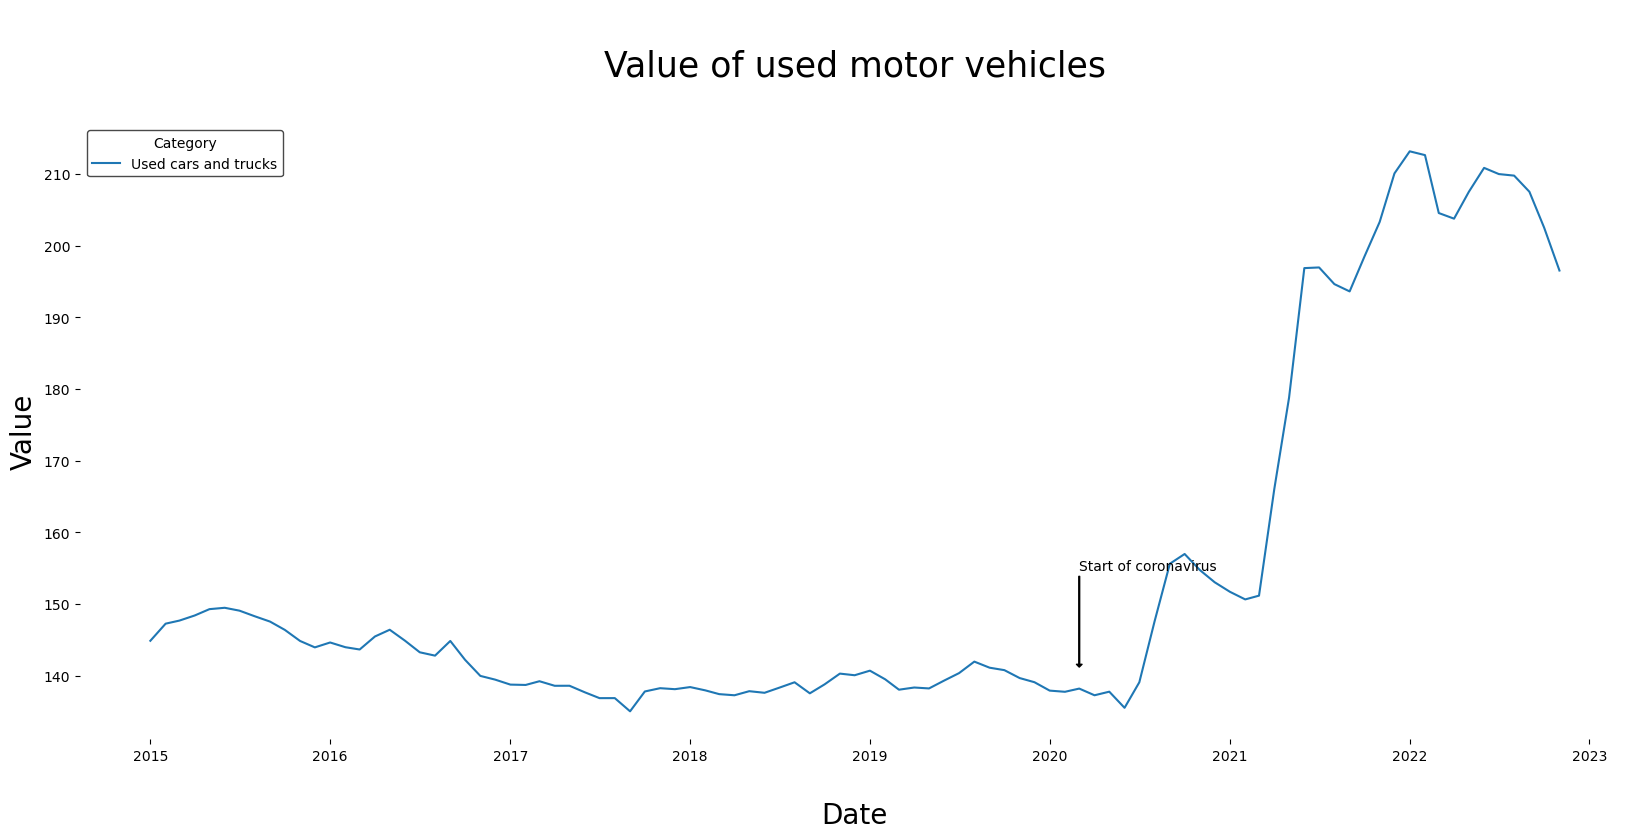

In [4]:
fig, ax = plt.subplots(figsize=(20, 8))

sns.lineplot(value_used_cars)

crisis_data = [
    (datetime(2020, 3, 1), "Start of coronavirus")
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, value_used_cars.asof(date) + 3),
                xytext=(date, value_used_cars.asof(date) + 18),
                arrowprops=dict(facecolor="black", headwidth=4, width=.6,
                                headlength=2),
                horizontalalignment="left", verticalalignment="top")

ax.set_title("\nValue of used motor vehicles\n", fontsize=25)
ax.set_xlabel("\nDate", fontsize=20)
ax.set_ylabel("Value", fontsize=20)
ax.legend(["Used cars and trucks"], title="Category", edgecolor="#1c1c1c")
sns.despine(left=True, bottom=True)

plt.show()

In [18]:
relative_importance=pd.read_csv("Data_files/importance_transportation.csv", index_col=0)
relative_importance

,Importance
Item,
Transportation,18.182
Private transportation,17.404
New and used motor vehicles,9.218
New vehicles,4.105
Used cars and trucks,4.143
Leased cars and trucks,0.728


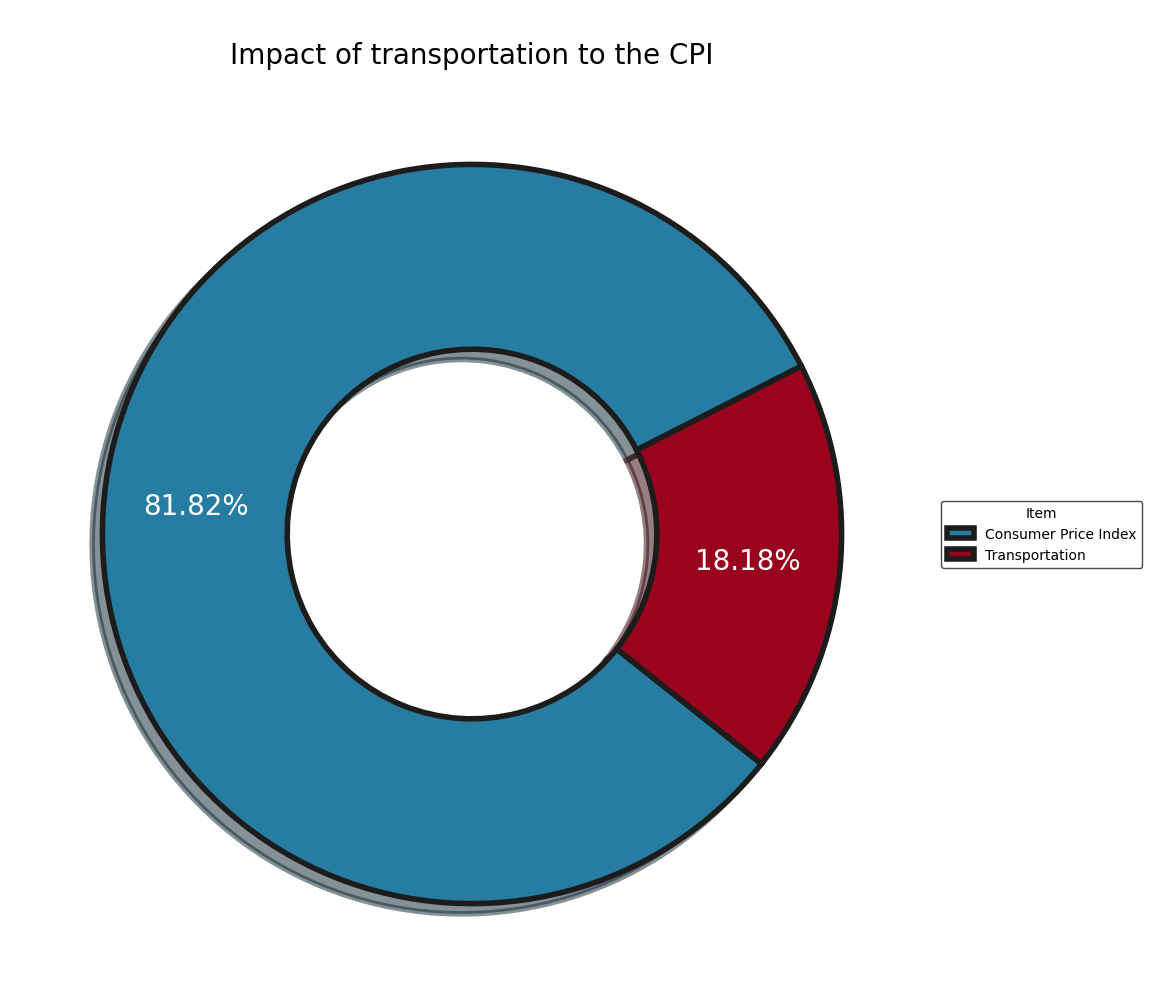

In [19]:
plt.subplots(figsize=(12, 12))

labels = ['Consumer Price Index', 'Transportation']
size = 0.5

slices = [(100 - relative_importance.Importance[0]),
          relative_importance.Importance[0]]

wedges, texts, autotexts = plt.pie(slices,
                                   textprops=dict(size=20, color="white"),
                                   autopct="%.2f%%",
                                   pctdistance=0.75,
                                   radius=1,
                                   colors=["#277da1","#9a031e"],
                                   # labels = labels, labeldistance = 1.05,
                                   shadow=True,
                                   wedgeprops=dict(width=size, edgecolor="#1c1c1c", linewidth=4),
                                   startangle=27)

plt.legend(wedges, labels, title="Item", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), edgecolor="#1c1c1c")
plt.title("\nImpact of transportation to the CPI", fontsize=20)
plt.show()


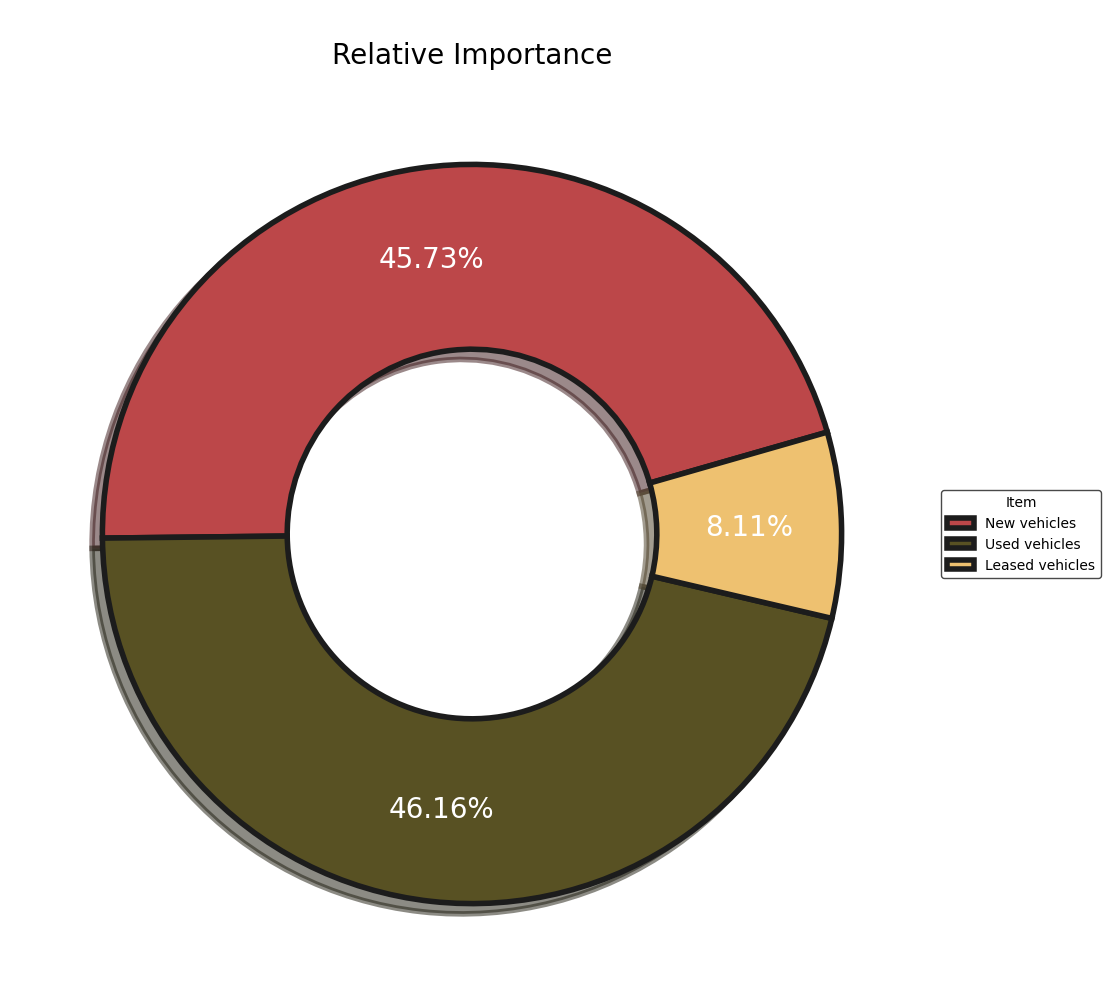

In [20]:
plt.subplots(figsize=(12, 12))

labels = ['New vehicles', 'Used vehicles', 'Leased vehicles']
size = 0.5

slices = [relative_importance.Importance[3],
          relative_importance.Importance[4],
          relative_importance.Importance[5]]

wedges, texts, autotexts = plt.pie(slices,
                                   textprops=dict(size=20, color="white"),
                                   autopct="%.2f%%",
                                   pctdistance=0.75,
                                   radius=1,
                                   colors=["#bc4749","#585123","#eec170"],
                                   # labels = labels, labeldistance = 1.05,
                                   shadow=True,
                                   wedgeprops=dict(width=size, edgecolor="#1c1c1c", linewidth=4),
                                   startangle=16)

plt.legend(wedges, labels, title="Item", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), edgecolor="#1c1c1c")
plt.title("\nRelative Importance", fontsize=20)
plt.show()